In [1]:
!pip install mlxtend


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.4/1.4 MB 3.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
#import utils
%matplotlib inline


In [5]:
#ASSOCIATION RULE MINING USING APRIORI ALGORITHMS
#importing and reading dataset
Retail = pd.read_csv('Retail_Shopping.csv')

In [6]:
#exploring dataset
Retail.head()

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [7]:
Retail.tail()

,0,1,2,3,4,5,6
310,Bread,Eggs,Cheese,NaN,NaN,NaN,NaN
311,Meat,Milk,Pencil,NaN,NaN,NaN,NaN
312,Bread,Cheese,Eggs,Meat,Pencil,Diaper,Wine
313,Meat,Cheese,NaN,NaN,NaN,NaN,NaN
314,Eggs,Wine,Bagel,Bread,Meat,NaN,NaN


In [8]:
Retail.describe()

,0,1,2,3,4,5,6
count,315,285,245,187,133,71,41
unique,9,9,9,9,9,9,9
top,Bread,Meat,Eggs,Milk,Wine,Pencil,Bread
freq,74,47,52,45,36,13,11


In [9]:
Retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       315 non-null    object
 1   1       285 non-null    object
 2   2       245 non-null    object
 3   3       187 non-null    object
 4   4       133 non-null    object
 5   5       71 non-null     object
 6   6       41 non-null     object
dtypes: object(7)
memory usage: 17.4+ KB


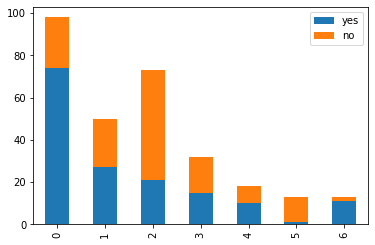

In [11]:
#stacked plotting and exploration of the various observations
yes = (Retail=='Bread').sum()
no = (Retail=='Eggs').sum()
diagnosed = pd.concat([yes,no],axis=1,keys=['yes','no'])
ax=diagnosed.plot.bar(stacked=True)
plt.show()

In [12]:
# Convert dataset to an encoded format
Retail1 = pd.get_dummies(Retail)

In [105]:
Retail1.head()

,0_Bagel,0_Bread,0_Cheese,0_Diaper,0_Eggs,0_Meat,0_Milk,0_Pencil,0_Wine,1_Bagel,...,5_Wine,6_Bagel,6_Bread,6_Cheese,6_Diaper,6_Eggs,6_Meat,6_Milk,6_Pencil,6_Wine
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
#creating association rule on main dataset
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


# calculates association rules
frequent_itemsets = apriori(Retail1, min_support=0.05)
association_rules = association_rules(frequent_itemsets,min_threshold=0.50)

# create a dataframe to store the association rules
rules_df = pd.DataFrame(association_rules, columns=['antecedents','consequents','support','confidence','lift'])
len(rules_df)


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


60

In [80]:
rules_df.shape

(60, 5)

In [81]:
#checking rules with highest Lift

rules_df.nlargest(10,"lift")

,antecedents,consequents,support,confidence,lift
50,"(33, 2)","(14, 22)",0.098413,0.968750,9.843750
55,"(14, 22)","(33, 2)",0.098413,1.000000,9.843750
51,"(33, 14)","(2, 22)",0.098413,0.939394,9.247159
54,"(2, 22)","(33, 14)",0.098413,0.968750,9.247159
52,"(33, 22)","(2, 14)",0.098413,0.885714,9.000000
53,"(2, 14)","(33, 22)",0.098413,1.000000,9.000000
30,"(2, 14)",(33),0.098413,1.000000,7.000000
31,(33),"(2, 14)",0.098413,0.688889,7.000000
36,"(2, 22)",(33),0.101587,1.000000,7.000000
37,(33),"(2, 22)",0.101587,0.711111,7.000000


In [82]:
#checking rules with highest Support
#Top rules has empty item sets on the LHS from the observationn below
rules_df.nlargest(10,"support")

,antecedents,consequents,support,confidence,lift
15,(33),(22),0.111111,0.777778,4.711538
16,(22),(33),0.111111,0.673077,4.711538
1,(24),(1),0.104762,0.733333,3.121622
13,(33),(14),0.104762,0.733333,4.914894
14,(14),(33),0.104762,0.702128,4.914894
4,(2),(22),0.101587,0.571429,3.461538
5,(22),(2),0.101587,0.615385,3.461538
6,(33),(2),0.101587,0.711111,4.000000
7,(2),(33),0.101587,0.571429,4.000000
34,"(33, 2)",(22),0.101587,1.000000,6.057692


In [83]:
#checking rules with highest Confidence
rules_df.nlargest(10,"confidence")

,antecedents,consequents,support,confidence,lift
18,"(24, 9)",(1),0.085714,1.0,4.256757
22,"(2, 14)",(22),0.098413,1.0,6.057692
24,"(14, 22)",(2),0.098413,1.0,5.625000
30,"(2, 14)",(33),0.098413,1.0,7.000000
34,"(33, 2)",(22),0.101587,1.0,6.057692
36,"(2, 22)",(33),0.101587,1.0,7.000000
42,"(14, 22)",(33),0.098413,1.0,7.000000
46,"(33, 2, 14)",(22),0.098413,1.0,6.057692
48,"(33, 14, 22)",(2),0.098413,1.0,5.625000
49,"(2, 14, 22)",(33),0.098413,1.0,7.000000


In [89]:
#creating association rule on main dataset
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#Reducing number of rules by increasing support and threshold
# calculates association rules
frequent_itemsets = apriori(Retail1, min_support=0.10)
association_rules = association_rules(frequent_itemsets,min_threshold=0.90)

# create a dataframe to store the association rules
rules_df = pd.DataFrame(association_rules, columns=['antecedents','consequents','support','confidence','lift'])
len(rules_df)


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


3

In [90]:
rules_df.shape

(3, 5)

In [91]:
#checking rules with highest Lift

rules_df.nlargest(10,"lift")

,antecedents,consequents,support,confidence,lift
2,"(2, 22)",(33),0.101587,1.000000,7.000000
0,"(33, 2)",(22),0.101587,1.000000,6.057692
1,"(33, 22)",(2),0.101587,0.914286,5.142857


In [92]:
#checking rules with highest Support
#Top rules has empty item sets on the LHS from the observationn below
rules_df.nlargest(10,"support")

,antecedents,consequents,support,confidence,lift
0,"(33, 2)",(22),0.101587,1.000000,6.057692
1,"(33, 22)",(2),0.101587,0.914286,5.142857
2,"(2, 22)",(33),0.101587,1.000000,7.000000


In [93]:
#checking rules with highest Confidence
rules_df.nlargest(10,"confidence")

,antecedents,consequents,support,confidence,lift
0,"(33, 2)",(22),0.101587,1.000000,6.057692
2,"(2, 22)",(33),0.101587,1.000000,7.000000
1,"(33, 22)",(2),0.101587,0.914286,5.142857


In [96]:
import plotly.express as px
rules_df = pd.DataFrame(association_rules, columns=['antecedents','consequents','support','confidence','lift'])
rules_df = rules_df.applymap(lambda x: list(x) if isinstance(x, frozenset) else x)
fig = px.scatter(rules_df,x="support",y="confidence",color="lift",
                 hover_data=['antecedents','consequents'],color_continuous_scale="agsunset")
fig.show()


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [99]:
Retail1.iloc[:,4].value_counts()

0    291
1     24
Name: 0_Eggs, dtype: int64